# Machine Learning on Graphs

# PageRank

In this lab, you will learn to use and interpret [PageRank](https://en.wikipedia.org/wiki/PageRank) for graph analysis.

You need to install [scikit-network](https://scikit-network.readthedocs.io/en/latest/) if not yet done:

In [ ]:
# !pip install scikit-network

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following real graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (weighted graph)
* WikiVitals (directed graph + bipartite graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## 1. Linear graph

We start with the following simple graph:

In [5]:
n = 10
graph = linear_graph(n, metadata=True)
adjacency = graph.adjacency
position = graph.position

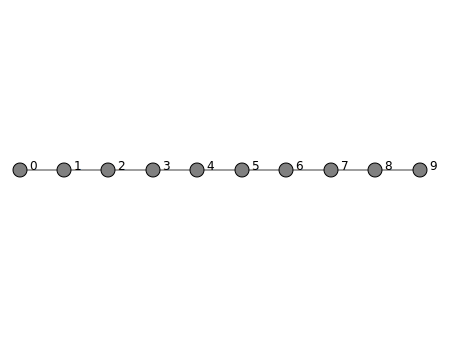

In [6]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes?<br> Try with different values of $\alpha \in [0,1)$ and interpret the results.
* What is the **exact** PageRank vector when $\alpha=1$?<br> You need to calculate it!
* Compute the Personalized PageRank vector starting from nodes 0 and 2.<br> What is the best ranked node?

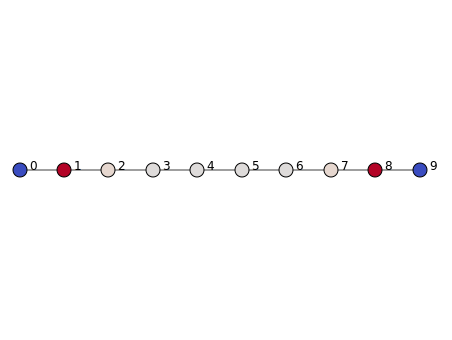

Best rank nodes, alpha=0.1 :
 [8 1]


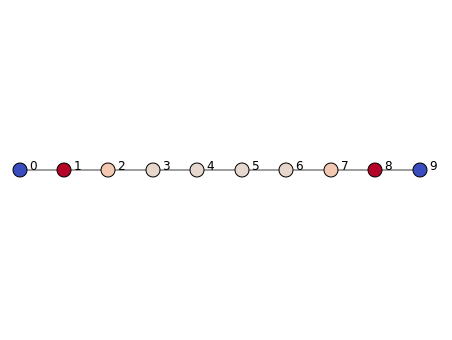

Best rank nodes, alpha=0.3 :
 [8 1]


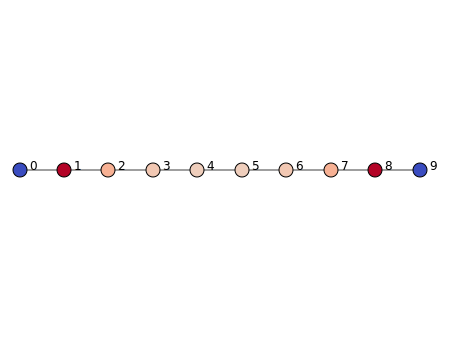

Best rank nodes, alpha=0.5 :
 [8 1]


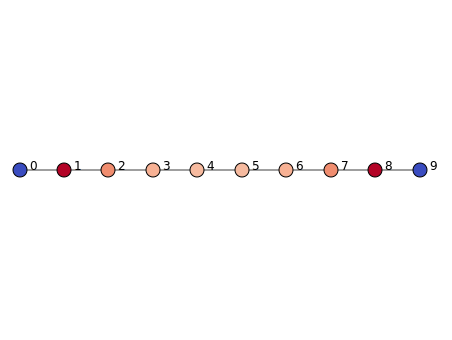

Best rank nodes, alpha=0.7 :
 [8 1]


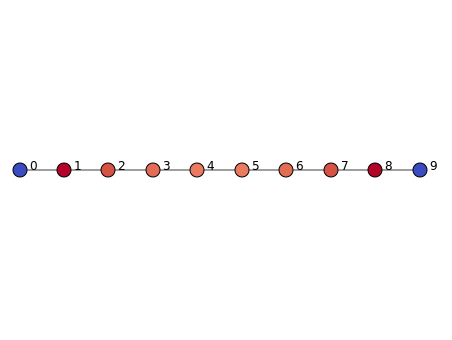

Best rank nodes, alpha=0.9 :
 [8 1]


In [7]:
for alpha in range(1,10,2):
    pagerank = PageRank(damping_factor=alpha/10, solver='lanczos')
    scores = pagerank.fit_transform(adjacency)
    image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
    display(SVG(image))
    print(f"Best rank nodes, alpha={alpha/10} :\n",np.argsort(scores)[:-3:-1])

In [8]:
transition = np.linalg.inv(np.diag(adjacency@np.ones(adjacency.shape[0])))@adjacency
pi = np.ones(transition.shape[0])/transition.shape[0]

for i in range(1000):
    pi = pi@transition
    if not i%100: 
        print(pi)

[0.05 0.15 0.1  0.1  0.1  0.1  0.1  0.1  0.15 0.05]
[0.05553479 0.11115014 0.1110793  0.11113188 0.1111039  0.1111039
 0.11113188 0.1110793  0.11115014 0.05553479]
[0.05555551 0.11111119 0.11111105 0.11111115 0.1111111  0.1111111
 0.11111115 0.11111105 0.11111119 0.05555551]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.05555556]
[0.05555556 0.11111111 0.11111111 0.11111111 0

Scores :
[0.1865224  0.26240564 0.24438024 0.13613611 0.07594001 0.04254626
 0.02416884 0.01432161 0.00952905 0.00404985]


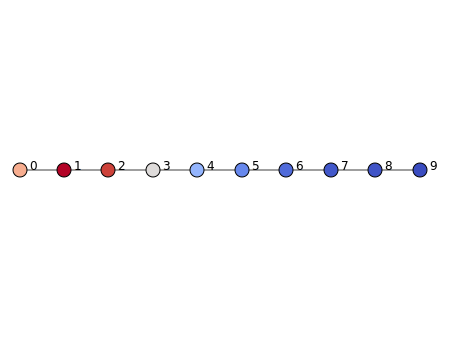

In [9]:
seed = {0:1,2:1}
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency, seeds=seed)
print("Scores :")
print(scores)
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
display(SVG(image))

## 2. Openflights


We now work on Openflights, the graph of daily flights between interational airports.

In [10]:
graph = openflights

In [11]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

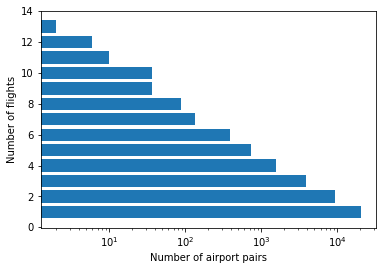

In [12]:
# daily number of flights
x, y = np.unique(adjacency.data, return_counts=True)
plt.barh(x, y)
plt.xscale('log')
plt.xlabel('Number of airport pairs')
plt.ylabel('Number of flights')
plt.show()

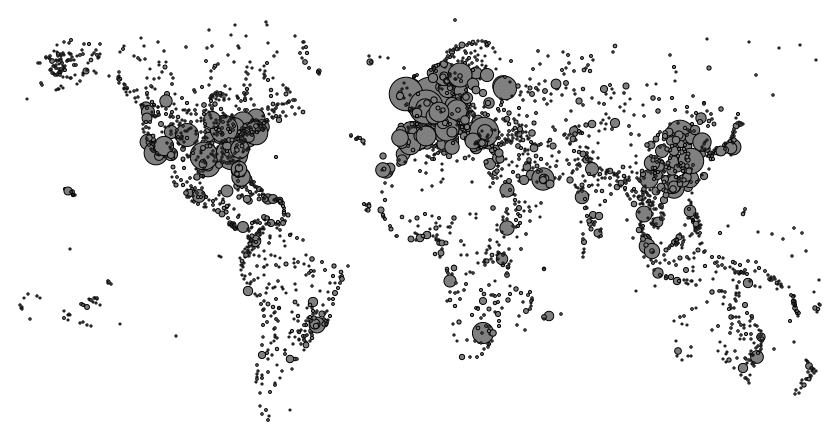

In [13]:
# edges not displayed
# node size = daily number of flights
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Show the same world map with PageRank scores.<br>
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Show the world map with Personalized PageRank scores, starting from **Beijing** international airport.
* List the corresponding 10 best ranked airports.

In [14]:
n = len(names)
# to be modified
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency)

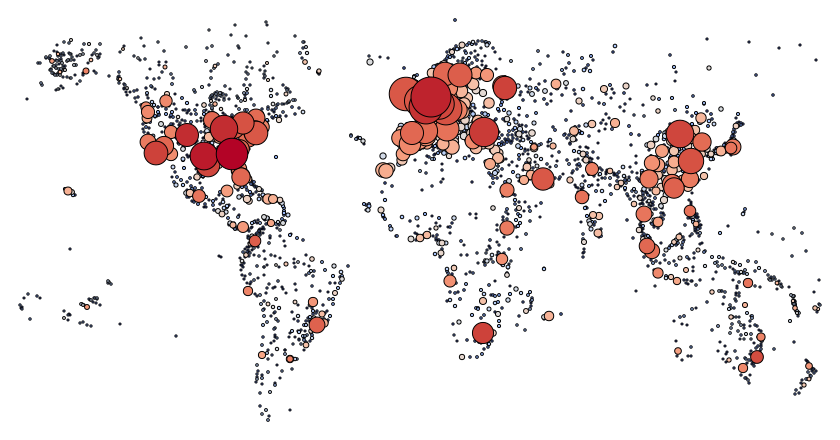

In [15]:
image = svg_graph(adjacency, position, width=800, height=400, scores=np.log(scores), node_order=np.argsort(scores), display_node_weight=True, display_edges=False)
SVG(image)

In [43]:
print(f"Best rank nodes :\n")
[print(name) for name in names[np.argsort(scores)[:-11:-1]]]
print()
print(f"Busiest airports :\n")
[print(name) for name in names[np.array(np.argsort(np.sum(adjacency, axis=0))).flatten()[:-11:-1]]]
print()

Best rank nodes :

Hartsfield Jackson Atlanta International Airport
Dallas Fort Worth International Airport
Amsterdam Airport Schiphol
Chicago O'Hare International Airport
Denver International Airport
Charles de Gaulle International Airport
Atatürk International Airport
Domodedovo International Airport
Los Angeles International Airport
OR Tambo International Airport

Busiest airports :

Amsterdam Airport Schiphol
Charles de Gaulle International Airport
Dublin Airport
Munich International Airport
Hartsfield Jackson Atlanta International Airport
London Gatwick Airport
Frankfurt am Main International Airport
Atatürk International Airport
Dallas Fort Worth International Airport
Beijing Capital International Airport



In [67]:
seed = np.where(names == "Beijing Capital International Airport")
seed = {x:1 for x in seed[0]}

In [68]:
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency, seeds=seed)

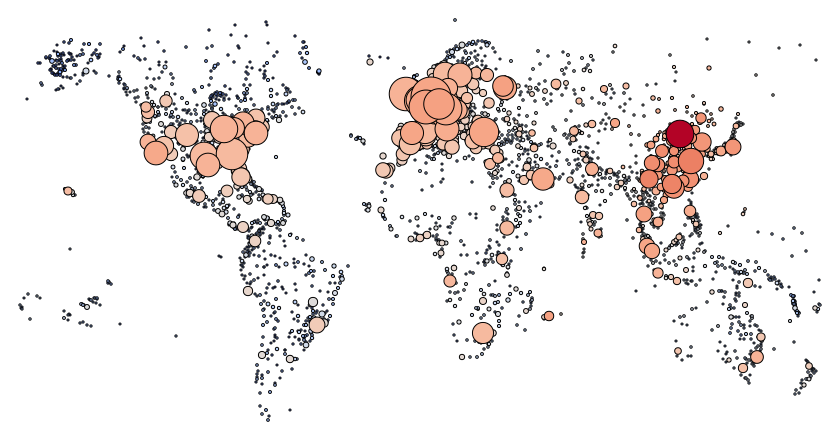

In [69]:
image = svg_graph(adjacency, position, width=800, height=400, scores=np.log(scores), node_order=np.argsort(scores), display_node_weight=True, display_edges=False)
SVG(image)

In [70]:
print(f"Best rank nodes :\n")
[print(name) for name in names[np.argsort(scores)[:-11:-1]]]
print()

Best rank nodes :

Beijing Capital International Airport
Shanghai Pudong International Airport
Kunming Changshui International Airport
Guangzhou Baiyun International Airport
Chengdu Shuangliu International Airport
Chongqing Jiangbei International Airport
Wuhan Tianhe International Airport
Xi'an Xianyang International Airport
Zhengzhou Xinzheng International Airport
Chek Lap Kok International Airport



## 3. Wikivitals

We now consider Wikivitals, the graph of hyperlinks between [vital articles](https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4) of Wikipedia.

In [87]:
graph = wikivitals

In [88]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked articles.
* Compare with the 10 articles of highest out-degrees and the 10 articles of highest in-degrees.<br>Interpret the results.

## To do
* List the 10 best ranked articles for the Personalized PageRank starting from **Pablo Picasso**. 
* List the 10 best ranked articles for the Personalized PageRank starting from **Cat** and **Dog**.
* To get more specific results, propose another method based on the difference between 2 PageRank vectors.

In [89]:
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency)
print(f"Best rank nodes :\n")
[print(name) for name in names[np.argsort(scores)[:-11:-1]]]
print()

Best rank nodes :

United States
World War II
The New York Times
Geographic coordinate system
Latin
India
China
France
United Kingdom
World War I



In [90]:
n = len(names)
out_degrees = np.ones(n)@adjacency
in_degrees = np.ones(n)@adjacency.T

print("Best out pages :\n")
[print(name) for name in names[np.argsort(out_degrees)[:-11:-1]]]
print()
print("Best in pages :\n")
[print(name) for name in names[np.argsort(in_degrees)[:-11:-1]]]
print()

Best out pages :

United States
The New York Times
World War II
India
China
France
Geographic coordinate system
United Kingdom
Latin
Australia

Best in pages :

Europe
Africa
History of art
France
Latin America
Human history
South America
Asia
Biology
Human



In [93]:
seed = {i:1 for i, name in enumerate(names) if "Pablo Picasso" in name} 
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency, seeds=seed)
print(f"Best rank nodes :\n")
[print(name) for name in names[np.argsort(scores)[:-11:-1]]]
print()

Best rank nodes :

Pablo Picasso
The New York Times
World War II
World War I
Paris
Modernism
Museum of Modern Art
Cubism
Romanticism
Impressionism



In [94]:
seed = {i:1 for i, name in enumerate(names) if name=="Cat" or name=="Dog"} 
pagerank = PageRank(solver='lanczos')
scores = pagerank.fit_transform(adjacency, seeds=seed)
print(f"Best rank nodes :\n")
[print(name) for name in names[np.argsort(scores)[:-11:-1]]]
print()

Best rank nodes :

Dog
Cat
Taxonomy (biology)
Animal
Mammal
Chordate
Latin
World War II
Carl Linnaeus
Carnivora



## To do

Propose a method to get the 10 most representative articles of each category (Arts, Biology, ...)

In [95]:
labels = graph.labels
names_labels = graph.names_labels

In [96]:
print(names_labels)

['Arts' 'Biological and health sciences' 'Everyday life' 'Geography'
 'History' 'Mathematics' 'People' 'Philosophy and religion'
 'Physical sciences' 'Society and social sciences' 'Technology']


## To do

Compare previous results to those obtained with the textual content of articles. 

In [ ]:
biadjacency = graph.biadjacency
words = graph.names_col